# Predicting Loan Defaults using Deep Learning with Keras & Tensorflow

# Problem Statement: 

For companies like Lending Club, predicting loan default with high accuracy is very important. Using the historical Lending Club data from 2007 to 2015, build a deep learning model to predict the chance of default for future loans.

# Analysis to be done: 

Perform data preprocessing, exploratory data analysis, and feature engineering. Build a deep learning model to predict load default using the historical public data (https://www.lendingcub.com).

# Dataset:

The data set used here can be downloaded from here. The CSV file contains complete loan data for all loans issued through 2007–2015, including the current loan status and payment information. Additional features include annual income, public records, revolving balance, and others.

# Dataset columns and definition:

 - credit.policy: “1” — if the customer meets the credit underwriting criteria of LendingClub.com, and “0” otherwise.
 - purpose: The purpose of the loan (“credit_card”, “debt_consolidation”, “educational”, “major_purchase”, “small_business”, and “all_other”).
 - int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be riskier are assigned higher interest rates.
 - installment: The monthly installments are owed by the borrower if the loan is funded.
 - log.annual.inc: The natural log of the self-reported annual income of the borrower.
 - dti: The debt-to-income ratio of the borrower (=amount of debt / annual income).
 - fico: The FICO credit score of the borrower.
 - days.with.cr.line: The number of days the borrower has had a credit line.
 - revol.bal: The borrower’s revolving balance (amount unpaid at the end of the credit card billing cycle).
 - revol.util: The borrower’s revolving line utilization rate (the amount of the credit line used relative to total credit available).
 - inq.last.6mths: The borrower’s number of inquiries by creditors in the last 6 months.
 - delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
 - pub.rec: The borrower’s number of derogatory public records (bankruptcy filings, tax liens, or judgments).
# Let’s jump into the code. I’m breaking code into multiple snippets here. For full code, click here.

In [ ]:
!pip install grpcio==1.24.3
!pip install tensorflow==2.2.0
!pip install pillow

In [1]:
import tensorflow as tf
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown('# <span style="color:red">'+string+'</span>'))


if not tf.__version__ == '2.2.0':
    printmd('<<<<<!!!!! ERROR !!!! please upgrade to TensorFlow 2.2.0, or restart your Kernel (Kernel->Restart & Clear Output)>>>>>')

#  Import libraries

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from pickle import dump, load


%matplotlib inline

# Read the Loan data CSV and pull the file info.

In [3]:
df = pd.read_csv('loan_data.csv')

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## The “Purpose” data column is categorical, “Annual income” is log value, which needs to be converted back to exponential. The rest of the columns are numerical. Transpose the data frame to understand the std and mean.

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


# Check the label “no.fully.paid” distribution in the dataset.

In [6]:
df['not.fully.paid'].isnull().mean()

0.0

In [7]:
df1=pd.get_dummies(df, columns=['purpose'])

In [8]:
df1['log.annual.inc'] = np.exp(df1['log.annual.inc'])

In [9]:
df1.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,85000.000385,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,65000.000073,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,31999.999943,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,85000.000385,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,80799.999636,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [10]:
df.groupby('not.fully.paid')['not.fully.paid'].count()/len(df)

not.fully.paid
0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

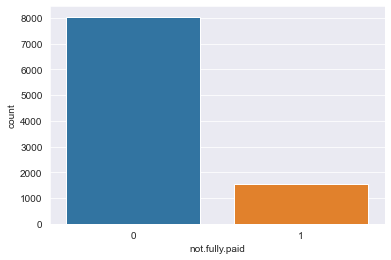

In [11]:
sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid', data=df)

The above shows, This dataset is highly imbalanced and includes features that make this problem more challenging. If we do model training with this data, the prediction will be biased since the “not.fully.paid =0 “ has 83.9% filled, and only 16% is the “not.fully.paid=1”

There were multiple methods to handle imbalanced data; here are a few techniques.
1. Resample the training set
There are two approaches to make a balanced dataset out of an imbalanced one are under-sampling and over-sampling.
Under-sampling
Under-sampling balances the dataset by reducing the size of the abundant class. This method is used when the quantity of data is sufficient.
Over-sampling
Oversampling is used when the quantity of data is insufficient. It tries to balance the dataset by increasing the size of rare samples.
There is no absolute advantage of one resampling method over another.
2. K-fold Cross-Validation
Cross-validation should be applied properly while using the over-sampling method to address imbalance problems. Cross-validation should always be done before over-sampling the data.
If cross-validation is applied after over-sampling, basically, what we are doing is overfitting our model to a specific result.
3. Ensemble different resampled datasets
This approach is simple and perfectly horizontally scalable if you have a lot of data since you can train and run your models on different cluster nodes. Ensemble models also tend to generalize better, which makes this approach easy to handle.
4. Resample with different ratios
The previous approach can be fine-tuned by playing with the ratio between the rare and the abundant class. The best ratio heavily depends on the data and the models that are used. But instead of training all models with the same ratio in the ensemble, it is worth trying to ensemble different ratios. So if 10 models are trained, it might make sense to have a model that has a ratio of 1:1 (rare:abundant) and another one with 1:3, or even 2:1. Depending on the model used, this can influence the weight that one class gets.
5. Cluster the abundant class
An elegant approach was proposed by Sergey on Quora [2]. Instead of relying on random samples to cover the variety of the training samples, he suggests clustering the abundant class in r groups, with r being the number of cases in r. For each group, only the medoid (center of cluster) is kept. The model is then trained with the rare class and the medoids only.
6. Design your own models
All the previous methods focus on the data and keep the models as a fixed component. But in fact, there is no need to resample the data if the model is suited for imbalanced data. The famous XGBoost is already a good starting point if the classes are not skewed too much because it internally takes care that the bags it trains on are not imbalanced. But then again, the data is resampled; it is just happening secretly.
By designing a cost function that is penalizing the wrong classification of the rare class more than wrong classifications of the abundant class, it is possible to design many models that naturally generalize in favor of the rare class. For example, tweaking an SVM to penalize wrong classifications of the rare class by the same ratio that this class is underrepresented.

# The dataset used here is minimal; I chose to try oversampling to balance this dataset.

In [12]:
count_class_0, count_class_1 = df['not.fully.paid'].value_counts()

In [13]:
df_0 = df[df['not.fully.paid'] == 0]
df_1 = df[df['not.fully.paid'] == 1]

In [14]:
df_1_over = df_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_0, df_1_over], axis=0)

In [15]:
print('Random over-sampling:')
print(df_test_over['not.fully.paid'].value_counts())

Random over-sampling:
1    8045
0    8045
Name: not.fully.paid, dtype: int64


<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

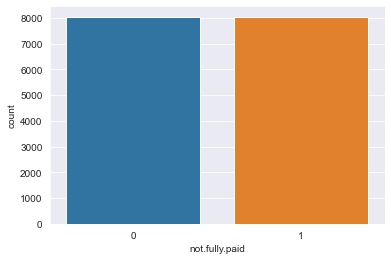

In [16]:
#df_test_over['not.fully.paid'].value_counts().plot(kind='bar', title='Count (not.fully.paid)')

sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid', data=df_test_over)

# Exploratory Data Analysis
Let’s see some data visualization with seaborn and plotting. Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.

<AxesSubplot:>

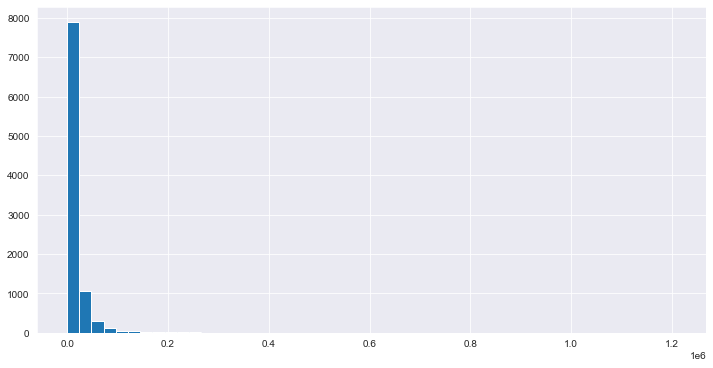

In [17]:
df['revol.bal'].hist(figsize=[12,6], bins=50)

In [18]:
df1=pd.get_dummies(df, columns=['purpose'])

Text(0.5, 0, 'FICO')

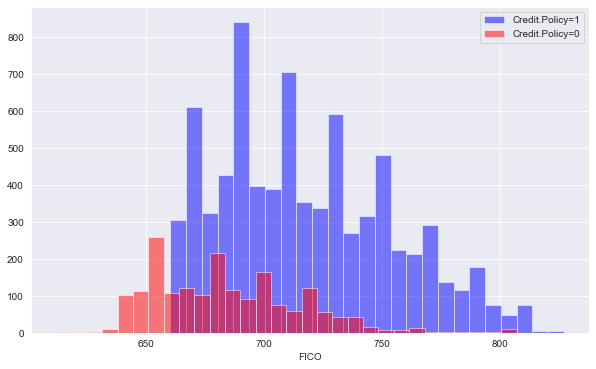

In [19]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

# Let's see a similar chart for “not.fully.paid” column.


Text(0.5, 0, 'FICO')

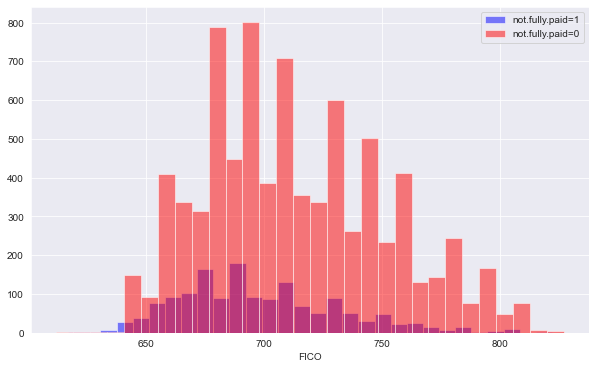

In [20]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

Now, check the dataset group by loan purpose. Create a countplot with the color hue defined by not.fully.paid.

<AxesSubplot:xlabel='purpose', ylabel='count'>

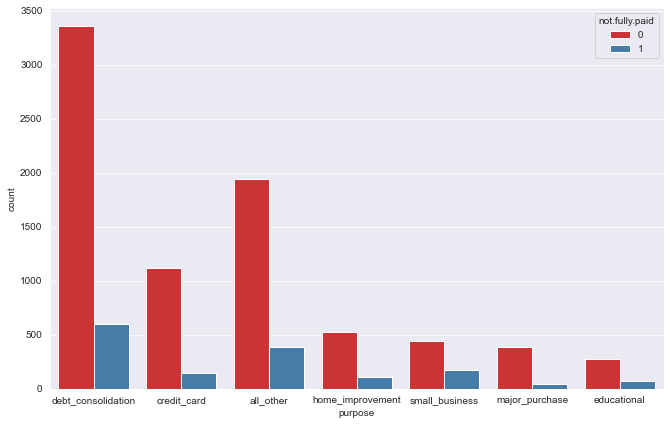

In [21]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=df,palette='Set1')

The next visual we will pull part of EDA in this dataset is the trend between FICO score and interest rate.

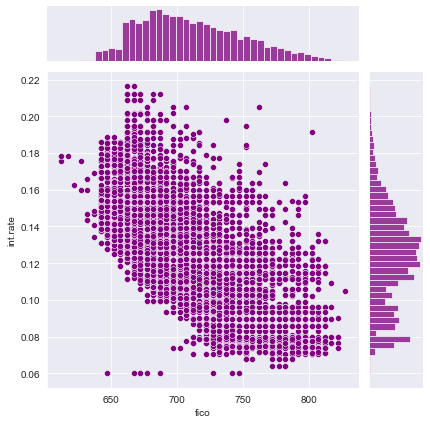

In [22]:
sns.jointplot(x='fico',y='int.rate',data=df,color='purple')

To compare the trend between not.fully.paid and credit.policy, create seaborn implot.

<Figure size 792x504 with 0 Axes>

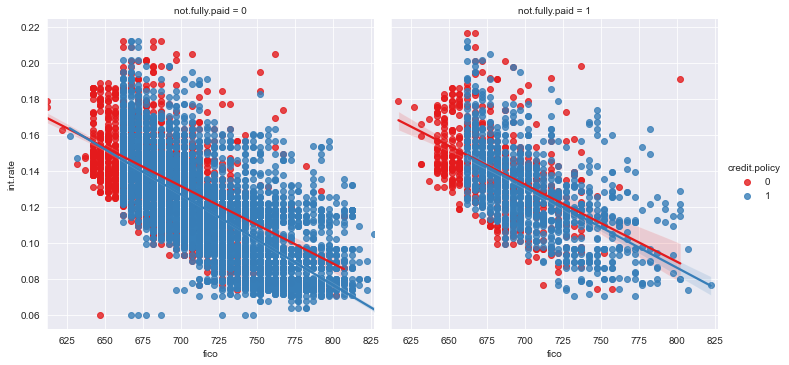

In [23]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

The above visuals gave us an idea of how the data is and what we will work with. Nest step is to prepare the data for model training and test as the first step converts the categorical values to numeric. Here in this dataset “purpose” column is a critical data point for the model as per our analysis above, and it is categorical.

In [24]:
cat_feats = ['purpose']
#cat_feats =df_test_over

In [25]:
#final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)
final_data = pd.get_dummies(df_test_over,columns=cat_feats,drop_first=True)

In [26]:
final_data.info()
final_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16090 entries, 0 to 1896
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               16090 non-null  int64  
 1   int.rate                    16090 non-null  float64
 2   installment                 16090 non-null  float64
 3   log.annual.inc              16090 non-null  float64
 4   dti                         16090 non-null  float64
 5   fico                        16090 non-null  int64  
 6   days.with.cr.line           16090 non-null  float64
 7   revol.bal                   16090 non-null  int64  
 8   revol.util                  16090 non-null  float64
 9   inq.last.6mths              16090 non-null  int64  
 10  delinq.2yrs                 16090 non-null  int64  
 11  pub.rec                     16090 non-null  int64  
 12  not.fully.paid              16090 non-null  int64  
 13  purpose_credit_card         1609

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [27]:
final_data.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
credit.policy,1.000000,-0.291556,0.051472,0.022361,-0.110677,0.376205,0.092463,-0.187580,-0.107363,-0.545939,-0.056475,-0.057786,-0.207781,0.014358,0.023549,-0.031919,-0.002180,0.039901,0.002081
int.rate,-0.291556,1.000000,0.272619,0.087859,0.205746,-0.677689,-0.097013,0.090729,0.421090,0.185017,0.142285,0.107672,0.226742,-0.046019,0.082171,-0.015948,-0.046461,-0.063621,0.183396
installment,0.051472,0.272619,1.000000,0.473229,0.029767,0.107957,0.184525,0.241466,0.048765,-0.022944,-0.002394,-0.036783,0.069169,0.007909,0.118995,-0.098569,0.027104,-0.057706,0.186640
log.annual.inc,0.022361,0.087859,0.473229,1.000000,-0.022773,0.107534,0.357343,0.376741,0.083577,0.023441,0.024759,0.012444,-0.040765,0.077339,-0.022465,-0.115085,0.096263,-0.027329,0.123351
dti,-0.110677,0.205746,0.029767,-0.022773,1.000000,-0.223893,0.098696,0.158124,0.321856,0.040299,-0.028918,0.030034,0.061295,0.074813,0.182174,-0.033309,-0.094527,-0.081482,-0.062924
fico,0.376205,-0.677689,0.107957,0.107534,-0.223893,1.000000,0.253702,-0.000490,-0.504446,-0.194447,-0.207297,-0.155035,-0.213695,-0.005873,-0.143394,-0.020651,0.099722,0.054722,0.079681
days.with.cr.line,0.092463,-0.097013,0.184525,0.357343,0.098696,0.253702,1.000000,0.260231,0.019980,-0.037116,0.072543,0.078810,-0.038564,0.065576,-0.005017,-0.052657,0.066785,-0.022001,0.049723
revol.bal,-0.187580,0.090729,0.241466,0.376741,0.158124,-0.000490,0.260231,1.000000,0.166235,0.026405,-0.029333,-0.032466,0.066765,0.051691,-0.017136,-0.035778,-0.022105,-0.054384,0.126108
revol.util,-0.107363,0.421090,0.048765,0.083577,0.321856,-0.504446,0.019980,0.166235,1.000000,-0.017179,-0.046663,0.083999,0.118060,0.087948,0.198195,-0.058763,-0.111081,-0.113632,-0.063330
inq.last.6mths,-0.545939,0.185017,-0.022944,0.023441,0.040299,-0.194447,-0.037116,0.026405,-0.017179,1.000000,-0.001081,0.098395,0.179945,-0.044834,-0.049462,0.038730,0.054812,0.009068,0.027217


<AxesSubplot:>

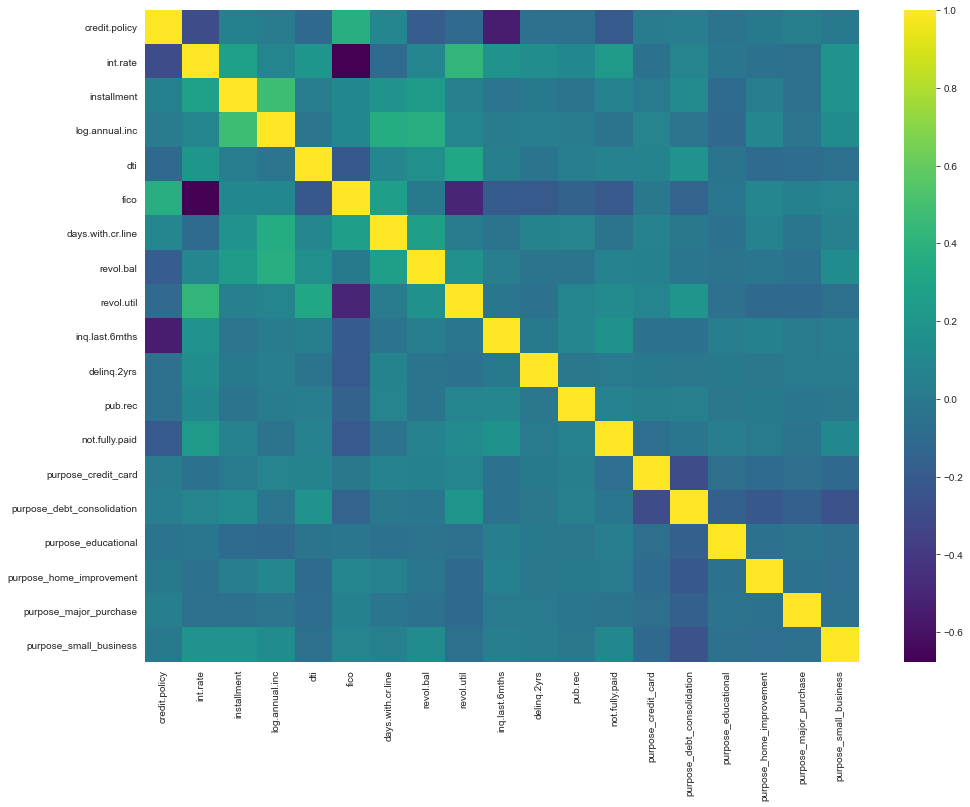

In [28]:
    final_data.corr()
    plt.figure(
            figsize=[16,12]
    )

    sns.heatmap(
            data=final_data.corr(), 
            cmap='viridis', 
            annot=False, 
            fmt='.2g'
    )

We only focus on the grids of yellow or very light green. After comparing with the feature description again, I decided to drop:’revol.bal’, ‘days.with.cr.line’, ‘installment’, ‘revol.bal’

revol.bal, day.with.cr.line, installment can represent by annual income. revol.util can represent by int.rate.

# Modeling

# Deep Learning Implementation

Finally, do the train test split and fit the model with the data shape we created above. since there are 19 features, I chose the first layer of the neural network with 19 nodes.

In [29]:
to_drop2 = ['revol.bal', 'days.with.cr.line', 'installment', 'revol.bal']

final_data.drop(to_drop2, axis=1, inplace=True)
#We only focus on the grids of yellow or very light green. After comparing with the feature description again,  revol.bal,day.with.cr.line,installment c

In [30]:
final_data.isnull().mean()

credit.policy                 0.0
int.rate                      0.0
log.annual.inc                0.0
dti                           0.0
fico                          0.0
revol.util                    0.0
inq.last.6mths                0.0
delinq.2yrs                   0.0
pub.rec                       0.0
not.fully.paid                0.0
purpose_credit_card           0.0
purpose_debt_consolidation    0.0
purpose_educational           0.0
purpose_home_improvement      0.0
purpose_major_purchase        0.0
purpose_small_business        0.0
dtype: float64

In [31]:
#to_train = df1[df1['not.fully.paid'].isin([0,1])]
#to_pred = df1[df1['not.fully.paid'] == 2]

to_train = final_data[final_data['not.fully.paid'].isin([0,1])]
to_pred = final_data[final_data['not.fully.paid'] == 2]

In [32]:
X = to_train.drop('not.fully.paid', axis=1).values
y = to_train['not.fully.paid'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

In [33]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
X_train.shape

(11263, 15)

In [35]:
model = Sequential()

model.add(
        Dense(94, activation='relu')
)

model.add(
        Dense(30, activation='relu')
)

model.add(
        Dense(15, activation='relu')
)


model.add(
        Dense(1, activation='sigmoid')
)

model.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['accuracy']
)

In [36]:
early_stop = EarlyStopping(
        monitor='val_loss', 
        mode='min', 
        verbose=1, 
        patience=25
)

model.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Epoch 1/200
44/44 [==============================] - 0s 7ms/step - loss: 0.6762 - accuracy: 0.5748 - val_loss: 0.6591 - val_accuracy: 0.6101
Epoch 2/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6495 - accuracy: 0.6202 - val_loss: 0.6499 - val_accuracy: 0.6145
Epoch 3/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6429 - accuracy: 0.6244 - val_loss: 0.6459 - val_accuracy: 0.6203
Epoch 4/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6397 - accuracy: 0.6284 - val_loss: 0.6447 - val_accuracy: 0.6190
Epoch 5/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6378 - accuracy: 0.6308 - val_loss: 0.6450 - val_accuracy: 0.6209
Epoch 6/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6362 - accuracy: 0.6319 - val_loss: 0.6441 - val_accuracy: 0.6300
Epoch 7/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6350 - accuracy: 0.6325 - val_loss: 0.6409 - val_accuracy: 0.6358
Epoch 8/200
4

Epoch 59/200
44/44 [==============================] - 0s 3ms/step - loss: 0.5741 - accuracy: 0.6867 - val_loss: 0.6149 - val_accuracy: 0.6698
Epoch 60/200
44/44 [==============================] - 0s 3ms/step - loss: 0.5729 - accuracy: 0.6902 - val_loss: 0.6173 - val_accuracy: 0.6576
Epoch 61/200
44/44 [==============================] - 0s 3ms/step - loss: 0.5728 - accuracy: 0.6891 - val_loss: 0.6092 - val_accuracy: 0.6712
Epoch 62/200
44/44 [==============================] - 0s 3ms/step - loss: 0.5703 - accuracy: 0.6892 - val_loss: 0.6213 - val_accuracy: 0.6569
Epoch 63/200
44/44 [==============================] - 0s 3ms/step - loss: 0.5684 - accuracy: 0.6902 - val_loss: 0.6143 - val_accuracy: 0.6696
Epoch 64/200
44/44 [==============================] - 0s 3ms/step - loss: 0.5673 - accuracy: 0.6969 - val_loss: 0.6145 - val_accuracy: 0.6656
Epoch 65/200
44/44 [==============================] - 0s 3ms/step - loss: 0.5652 - accuracy: 0.6971 - val_loss: 0.6107 - val_accuracy: 0.6646
Epoch 

# Model Evaluation and Validation

<AxesSubplot:>

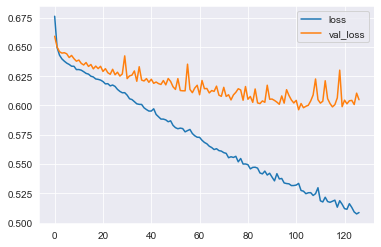

In [37]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot() #over fitting 

# This validation result, the Loss plot, shows us the model is overfitted.

In [38]:
predictions = model.predict_classes(X_test)

print(
        confusion_matrix(y_test,predictions), 
        '\n', 
        classification_report(y_test,predictions)
)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[[1536  901]
 [ 635 1755]] 
               precision    recall  f1-score   support

           0       0.71      0.63      0.67      2437
           1       0.66      0.73      0.70      2390

    accuracy                           0.68      4827
   macro avg       0.68      0.68      0.68      4827
weighted avg       0.68      0.68      0.68      4827



# Classification report

The model’s overall f1-score for accuracy is 0.69. Still, there are type 2 errors (624) in the prediction.

# Model Refinement

Two ways of refining the model we will try here. Add Dropout layers to bring down the overfitting OR Lower the cut-off line in binary prediction to reduce the Type 2 error, at the cost of increasing Type 1 error. In the LendingClub case, Type 2 error is the more serious problem because it devastates its balance sheet, while Type 1 error is not a very big deal.

In [39]:
model_new = Sequential()

model_new.add(
        Dense(94, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(30, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(15, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(1, activation='sigmoid')
)

model_new.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['binary_accuracy']
)


model_new.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Epoch 1/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6825 - binary_accuracy: 0.5605 - val_loss: 0.6670 - val_binary_accuracy: 0.6029
Epoch 2/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6618 - binary_accuracy: 0.6063 - val_loss: 0.6524 - val_binary_accuracy: 0.6109
Epoch 3/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6557 - binary_accuracy: 0.6183 - val_loss: 0.6497 - val_binary_accuracy: 0.6151
Epoch 4/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6506 - binary_accuracy: 0.6208 - val_loss: 0.6478 - val_binary_accuracy: 0.6126
Epoch 5/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6498 - binary_accuracy: 0.6193 - val_loss: 0.6457 - val_binary_accuracy: 0.6134
Epoch 6/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6452 - binary_accuracy: 0.6274 - val_loss: 0.6441 - val_binary_accuracy: 0.6149
Epoch 7/200
44/44 [==============================] - 0s 3ms/step - los

44/44 [==============================] - 0s 3ms/step - loss: 0.5922 - binary_accuracy: 0.6714 - val_loss: 0.6077 - val_binary_accuracy: 0.6692
Epoch 106/200
44/44 [==============================] - 0s 3ms/step - loss: 0.5917 - binary_accuracy: 0.6734 - val_loss: 0.6073 - val_binary_accuracy: 0.6692
Epoch 107/200
44/44 [==============================] - 0s 3ms/step - loss: 0.5908 - binary_accuracy: 0.6750 - val_loss: 0.6079 - val_binary_accuracy: 0.6658
Epoch 108/200
44/44 [==============================] - 0s 3ms/step - loss: 0.5947 - binary_accuracy: 0.6704 - val_loss: 0.6060 - val_binary_accuracy: 0.6723
Epoch 109/200
44/44 [==============================] - 0s 3ms/step - loss: 0.5881 - binary_accuracy: 0.6740 - val_loss: 0.6060 - val_binary_accuracy: 0.6696
Epoch 110/200
44/44 [==============================] - 0s 3ms/step - loss: 0.5925 - binary_accuracy: 0.6768 - val_loss: 0.6067 - val_binary_accuracy: 0.6692
Epoch 111/200
44/44 [==============================] - 0s 3ms/step - los

<AxesSubplot:>

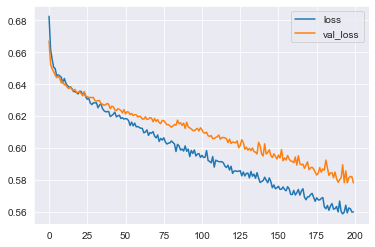

In [40]:
pd.DataFrame(model_new.history.history)[['loss','val_loss']].plot() #The graph shows that, by adding in Dropout layers, we have reduced the overfitting issue compared with the old model


The graph shows that, by adding in Dropout layers, we have reduced the overfitting issue compared with the old model.

In [41]:
predictions_new = (model_new.predict_proba(X_test) >= 0.2).astype('int')

print(
        confusion_matrix(y_test,predictions_new), 
        '\n', 
        classification_report(y_test,predictions_new)
)

Instructions for updating:
Please use `model.predict()` instead.
[[ 392 2045]
 [  21 2369]] 
               precision    recall  f1-score   support

           0       0.95      0.16      0.28      2437
           1       0.54      0.99      0.70      2390

    accuracy                           0.57      4827
   macro avg       0.74      0.58      0.49      4827
weighted avg       0.74      0.57      0.48      4827



By changing the cut-off line to 0.2 (default is 0.5), we have dramatically brought down the Type 2 error.

# Save the model and scalar.

In [42]:
dump(scaler, open('scaler.pkl', 'wb'))
model_new.save('my_model_lending_club.h5')

# Model Use Case

We will use the model on “not.fully.paid = 0” records; when these loans are matured, we will get it as the Out-Of-Time sample validation results.
In the future, this model can be used on any new customer to provide some insight when deciding whether to grant the loan.

In [43]:
later_scaler = load(open('scaler.pkl', 'rb'))
later_model = load_model('my_model_lending_club.h5')

In [53]:
X_OOT = to_pred.drop('not.fully.paid', axis=1).values

print(X_OOT.shape)

(0, 15)


# Conclusion

When building the Neural Network, the most difficult part is the Sequential Model because there are many different options available in building the layers. The way how to come up with the optimized number of layers and nodes are remaining challenging.

# Credits:

Github repository “Capstone-Lending-Club” by Sean329 Kaggle notebook “Lending Club Loan Analysis” by renjitmishra 7 Techniques to Handle Imbalanced Data By Ye Wu & Rick Radewagen, IE Business School. 
Full code link: https://github.com/sarathi-tech/lending-club/blob/main/Lending_Club_colab.ipynb
